# Proyecto. Métodos de clustering para series de tiempo
Por: Federico Salinas Samaniego

## Fase 2. Cálculo de Dynamic Time Warping (DTW)

Carga de librerías

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import mplcatppuccin
from mplcatppuccin.colormaps import get_colormap_from_list
import numpy as np
from scipy.stats.mstats import mquantiles

from Rutinas_DTW import DTW, MatrixDTW

mpl.style.use("mocha")
mocha_cmap = get_colormap_from_list("mocha", ["blue", "green", "yellow", "red"])
plt.rcParams.update({
    "text.usetex": True
})

Extracción de series de tiempo de la muestra

In [2]:
sample_series = []
sample_classes = []

with open("../input data/StarLightCurves_sample.txt", "r") as input_sample_file:
    for line in input_sample_file.readlines():
        split_line = line.split(" ")
        class_sample = int(split_line[0])
        series_sample = [float(value) for value in split_line[1:]]

        sample_series.append(series_sample)
        sample_classes.append(class_sample)

sample_series = np.array(sample_series)

## Dynamic Time Warping

In [3]:
q = 2.0

In [4]:
%%timeit

DTW(sample_series[0], sample_series[1], q = q)

11 ms ± 867 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
dtw_series = MatrixDTW(sample_series, q = q)

In [6]:
np.save("../output data/DTW.npy", dtw_series)

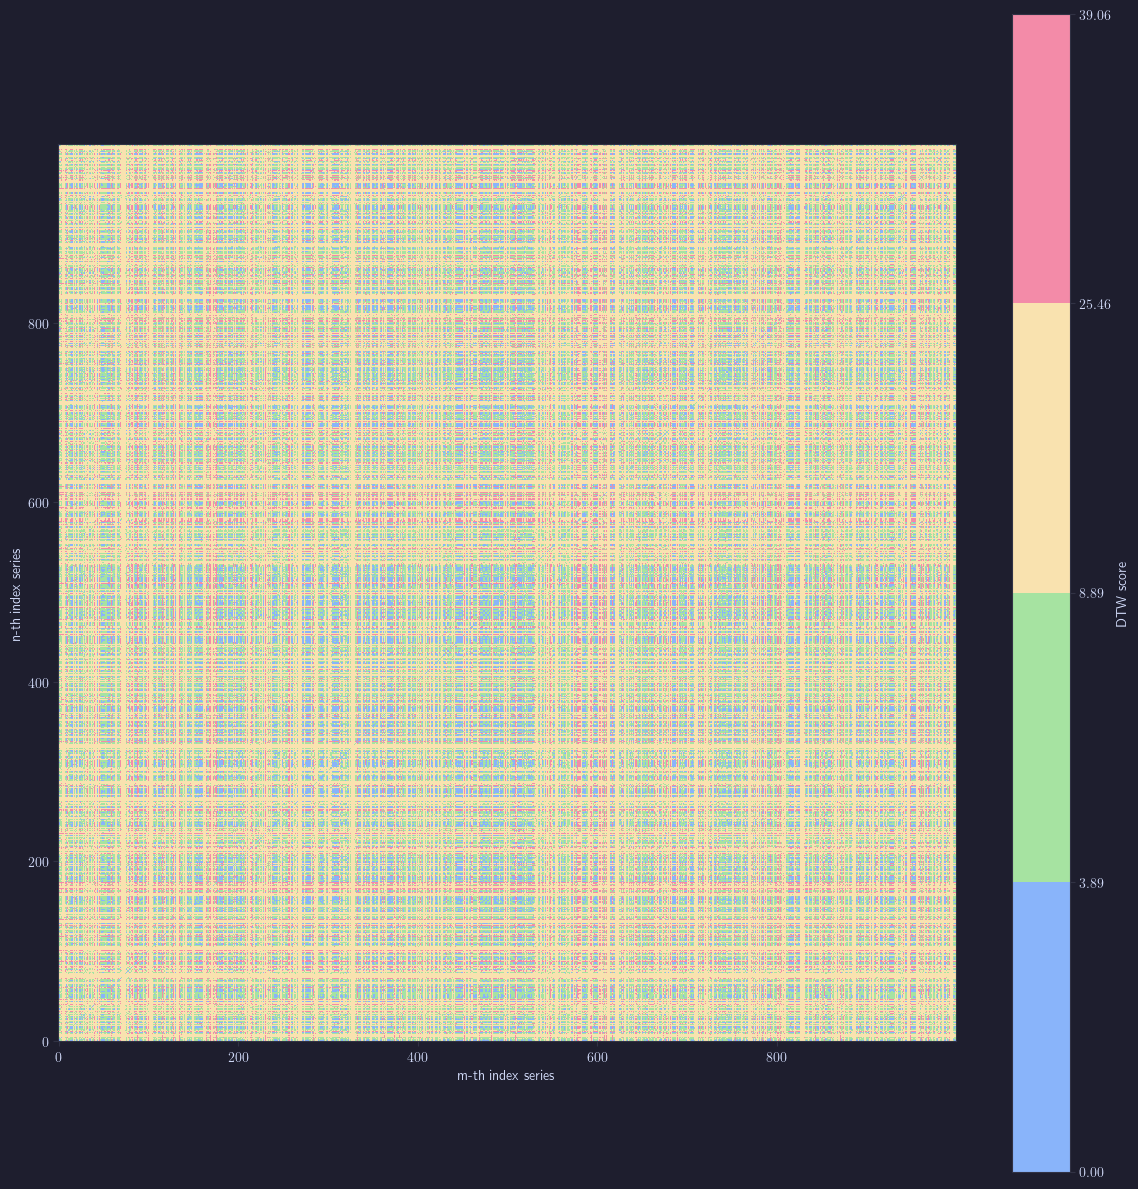

In [11]:
Figure_DTWmatrix = plt.figure(figsize=(12, 12))
Subplot_DTW = Figure_DTWmatrix.add_subplot(111)

min_quantiles_max_list = [dtw_series.min()] + list(mquantiles(dtw_series)) + [dtw_series.max()]
norm = BoundaryNorm(min_quantiles_max_list, mocha_cmap.N, extend = "neither")

DTW_image = Subplot_DTW.imshow(dtw_series, 
                               cmap = mocha_cmap, 
                               norm = norm,
                               aspect = "equal",
                               origin = "lower")
Subplot_DTW.set_ylabel("n-th index series")
Subplot_DTW.set_xlabel("m-th index series")
plt.colorbar(ScalarMappable(norm=norm, cmap = mocha_cmap), ax = Subplot_DTW, label = "DTW score")

Figure_DTWmatrix.tight_layout()

plt.show()